In [1]:
# imprt Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300
sns.set_style('darkgrid')

In [2]:
# Load Dataset

df = pd.read_csv('../../data/processed/tree_model_ready.csv')
df

,date,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,...,idle_ratio,day_num,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,department_label,quarter_label
0,2015-01-01,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725,...,0.0,3,False,False,False,True,False,False,1,0
1,2015-01-01,1,0.75,3.94,1039.0,960,0,0,8.0,0.886500,...,0.0,3,False,False,False,True,False,False,0,0
2,2015-01-01,11,0.80,11.41,968.0,3660,50,0,30.5,0.800570,...,0.0,3,False,False,False,True,False,False,1,0
3,2015-01-01,12,0.80,11.41,968.0,3660,50,0,30.5,0.800570,...,0.0,3,False,False,False,True,False,False,1,0
4,2015-01-01,6,0.80,25.90,1170.0,1920,50,0,56.0,0.800382,...,0.0,3,False,False,False,True,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,10,0.75,2.90,1039.0,960,0,0,8.0,0.628333,...,0.0,2,False,False,False,False,False,True,0,1
1193,2015-03-11,8,0.70,3.90,1039.0,960,0,0,8.0,0.625625,...,0.0,2,False,False,False,False,False,True,0,1
1194,2015-03-11,7,0.65,3.90,1039.0,960,0,0,8.0,0.625625,...,0.0,2,False,False,False,False,False,True,0,1
1195,2015-03-11,9,0.75,2.90,1039.0,1800,0,0,15.0,0.505889,...,0.0,2,False,False,False,False,False,True,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   wip                    1197 non-null   float64
 5   over_time              1197 non-null   int64  
 6   incentive              1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  overtime_bin           1197 non-null   object 
 11  wip_log                1197 non-null   float64
 12  idle_men_ratio         1197 non-null   float64
 13  idle_ratio             1197 non-null   float64
 14  day_num                1197 non-null   int64  
 15  day_

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,wip_log,idle_men_ratio,idle_ratio,day_num,department_label,quarter_label
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.150376,34.609858,0.735091,6.878233,0.006695,0.012822,2.812865,0.577277,1.252297
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,0.427848,22.197687,0.174488,0.544028,0.059987,0.222053,2.112252,0.494199,1.130974
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,2.000000,0.233705,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,9.000000,0.650307,6.878326,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,34.000000,0.773333,6.946976,0.000000,0.000000,2.000000,1.000000,1.000000
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,57.000000,0.850253,6.988413,0.000000,0.000000,5.000000,1.000000,2.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,2.000000,89.000000,1.120437,10.048583,0.775862,5.263157,6.000000,1.000000,3.000000


In [5]:
# Drop irrelevant column
df = df.drop(columns=['date'])

# One-hot encode categorical column
df = pd.get_dummies(df, columns=['overtime_bin'], drop_first=True, dtype=int)

# Convert booleans to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Define features and target
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

-  DecisionTreeRegressor cannot directly handle non-numeric features. 'overtime_bin' is a categorical column, so I converted it to binary (dummy) variables using one-hot encoding.

-  Boolean columns (day_Monday, day_Tuesday, etc.) are converted to integers (0/1) for consistency and clarity.

In [6]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Basline Model with default values

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

RMSE: 0.1470
MAE : 0.0881
R²  : 0.1867


-  As a first step, a baseline model was built using the default parameters of the DecisionTreeRegressor. This model was trained without any constraint on tree depth, minimum samples per leaf, or number of features considered at each split.

-  These results indicate that the model was only able to explain about 18.67% of the variance in the target variable (actual_productivity). This relatively poor performance is expected from an unregulated decision tree, which likely overfit to the training data due to its ability to grow indefinitely complex without any pruning or structure control. The tree might be fitting to noise or very specific patterns in the training set, which do not generalize to unseen data.

In [8]:
# Hyperparameter Tuning

model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf' : [0.0, 0.01],
    'max_leaf_nodes' : [20, 40],
    'max_features' : [0.5, .75]
}

-  To improve upon the baseline, a grid search approach was used to systematically explore various hyperparameter combinations.

In [9]:
# Grid search with cross-validation

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 15, None],
                         'max_features': [0.5, 0.75],
                         'max_leaf_nodes': [20, 40], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'min_weight_fraction_leaf': [0.0, 0.01],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [10]:
# Evaluate the best model

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Best Parameters: {'criterion': 'poisson', 'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}
RMSE: 0.1216
MAE : 0.0816
R²  : 0.4434


-  With these parameters, the model's performance improved significantly. This means the model now explains over 44% of the variance in productivity, more than twice as much as the default model. The improvements can be attributed to regularization, better choice of splitting criteria (poisson), and smarter structural constraints (e.g., limiting depth and number of leaves). The model is now better at generalizing to unseen data, and errors have decreased both in absolute (MAE) and squared (RMSE) terms.

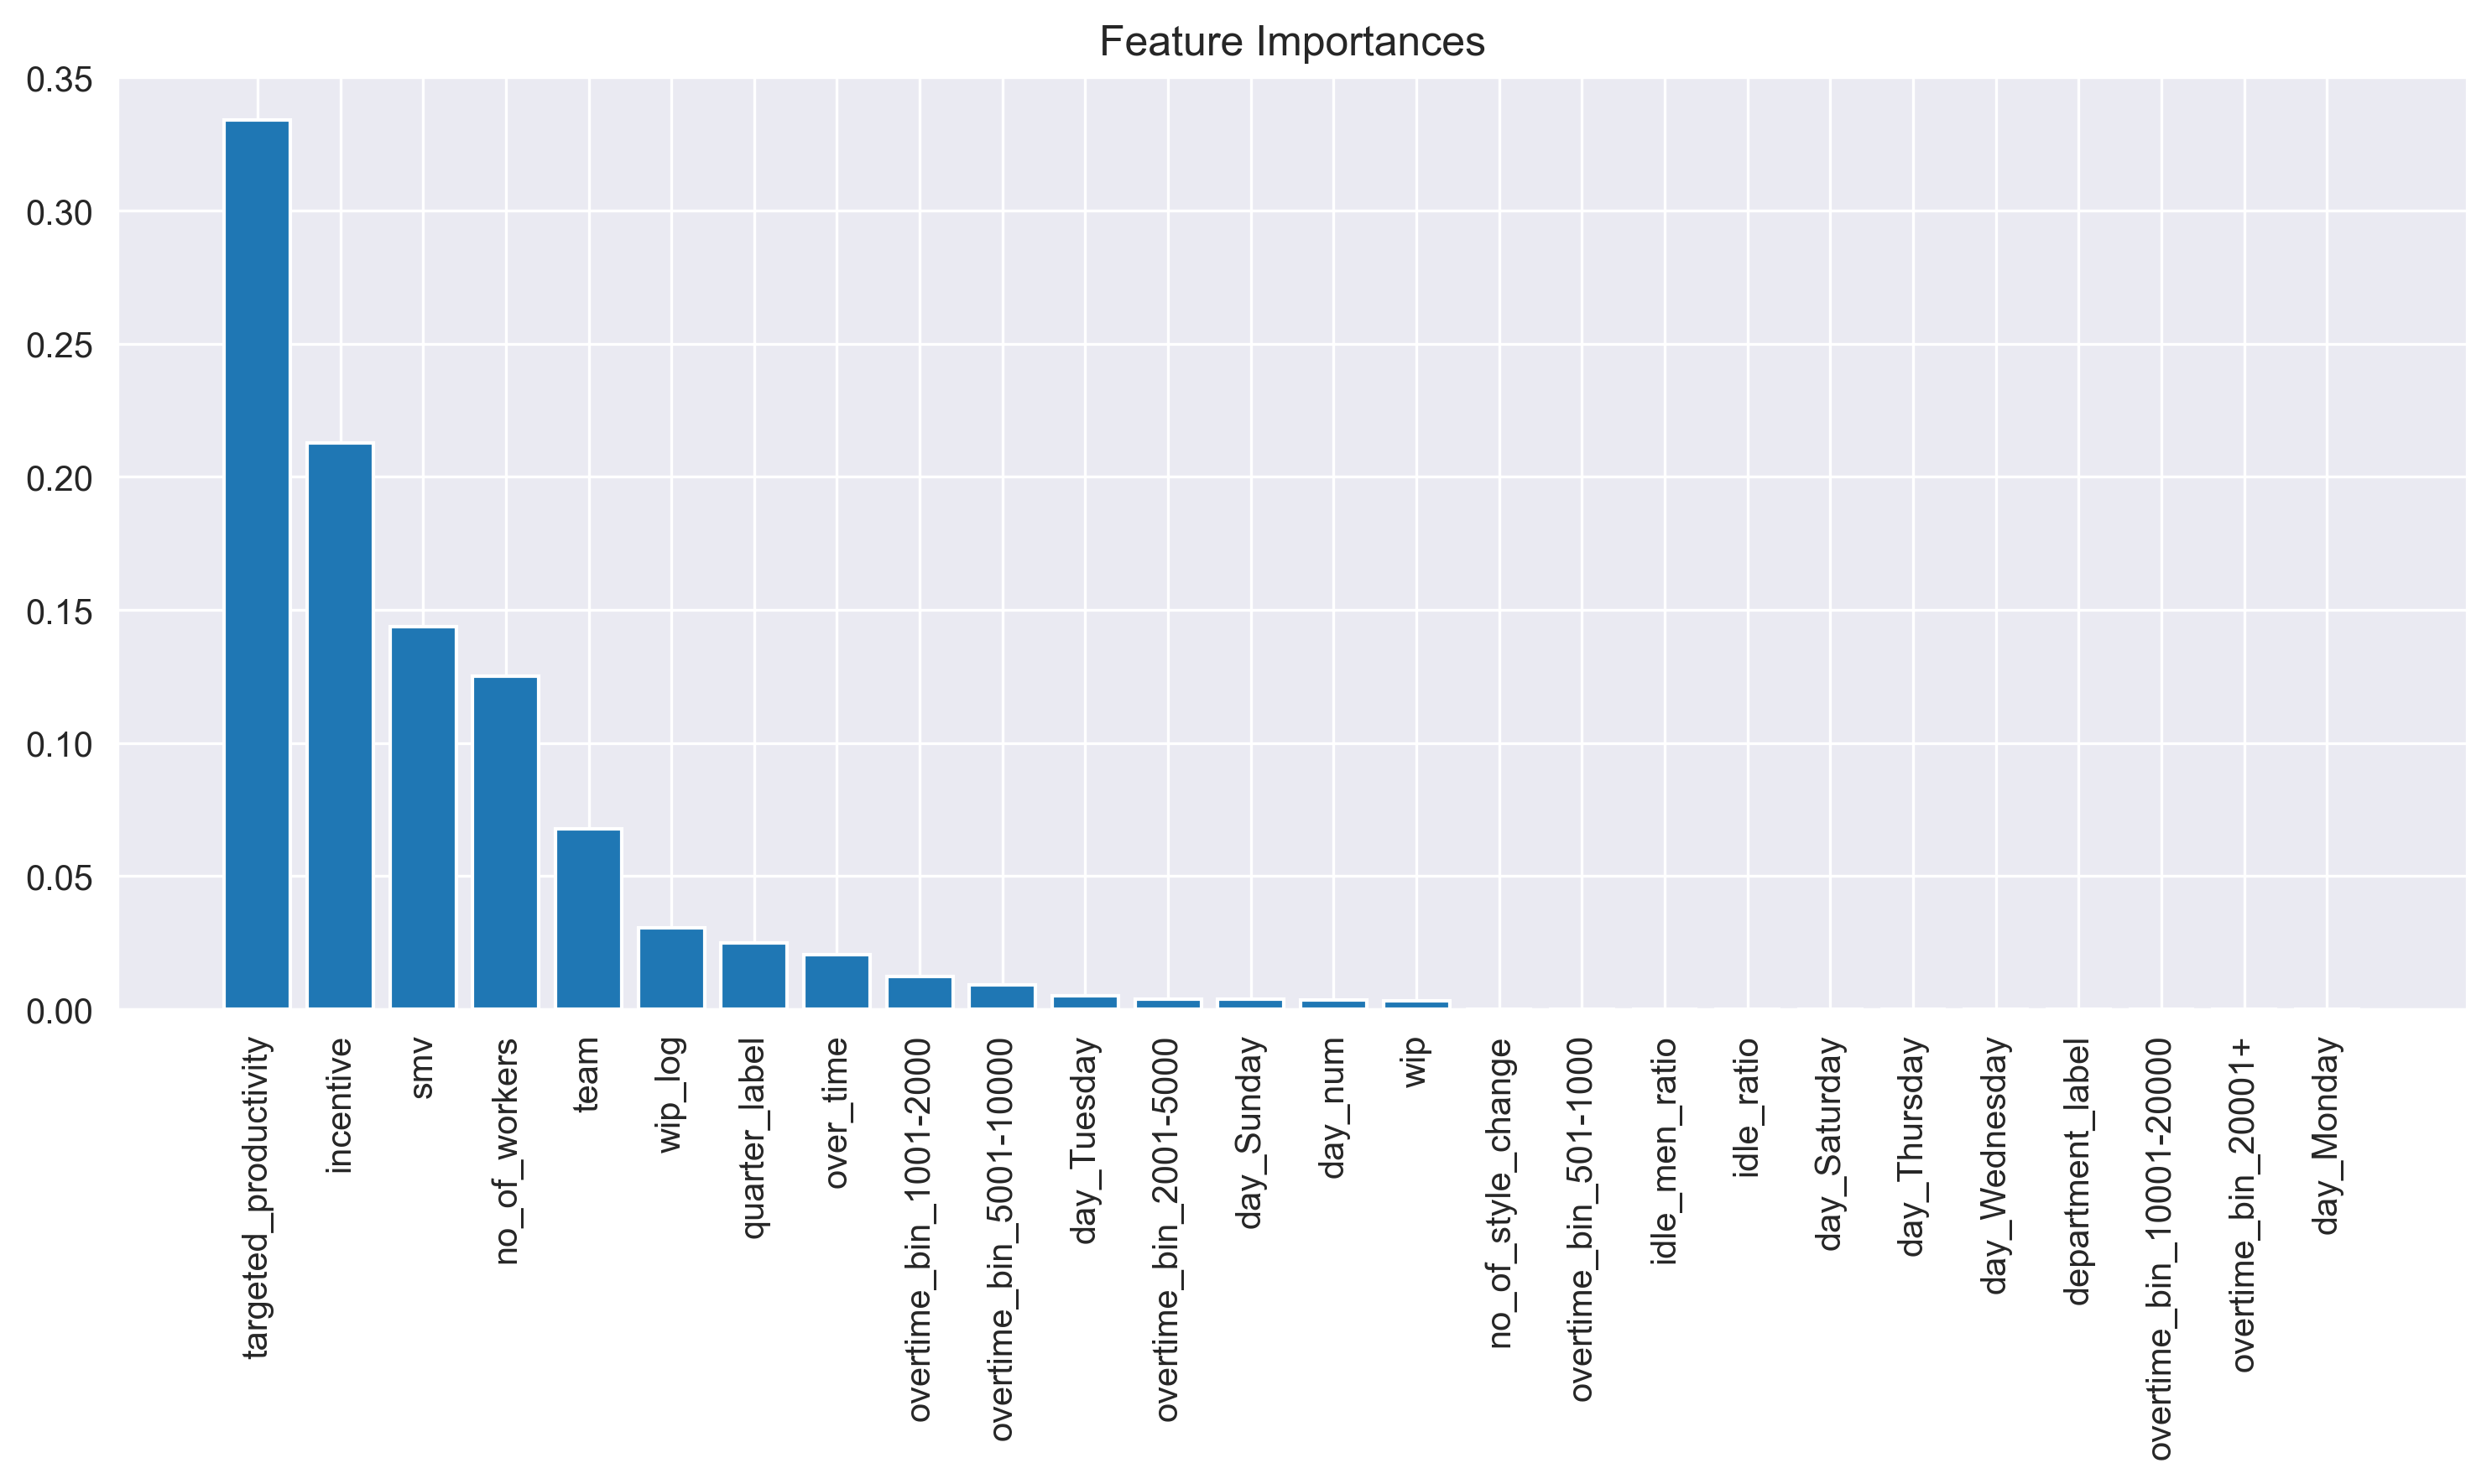

In [11]:
# Feature importance values

importances = best_tree.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

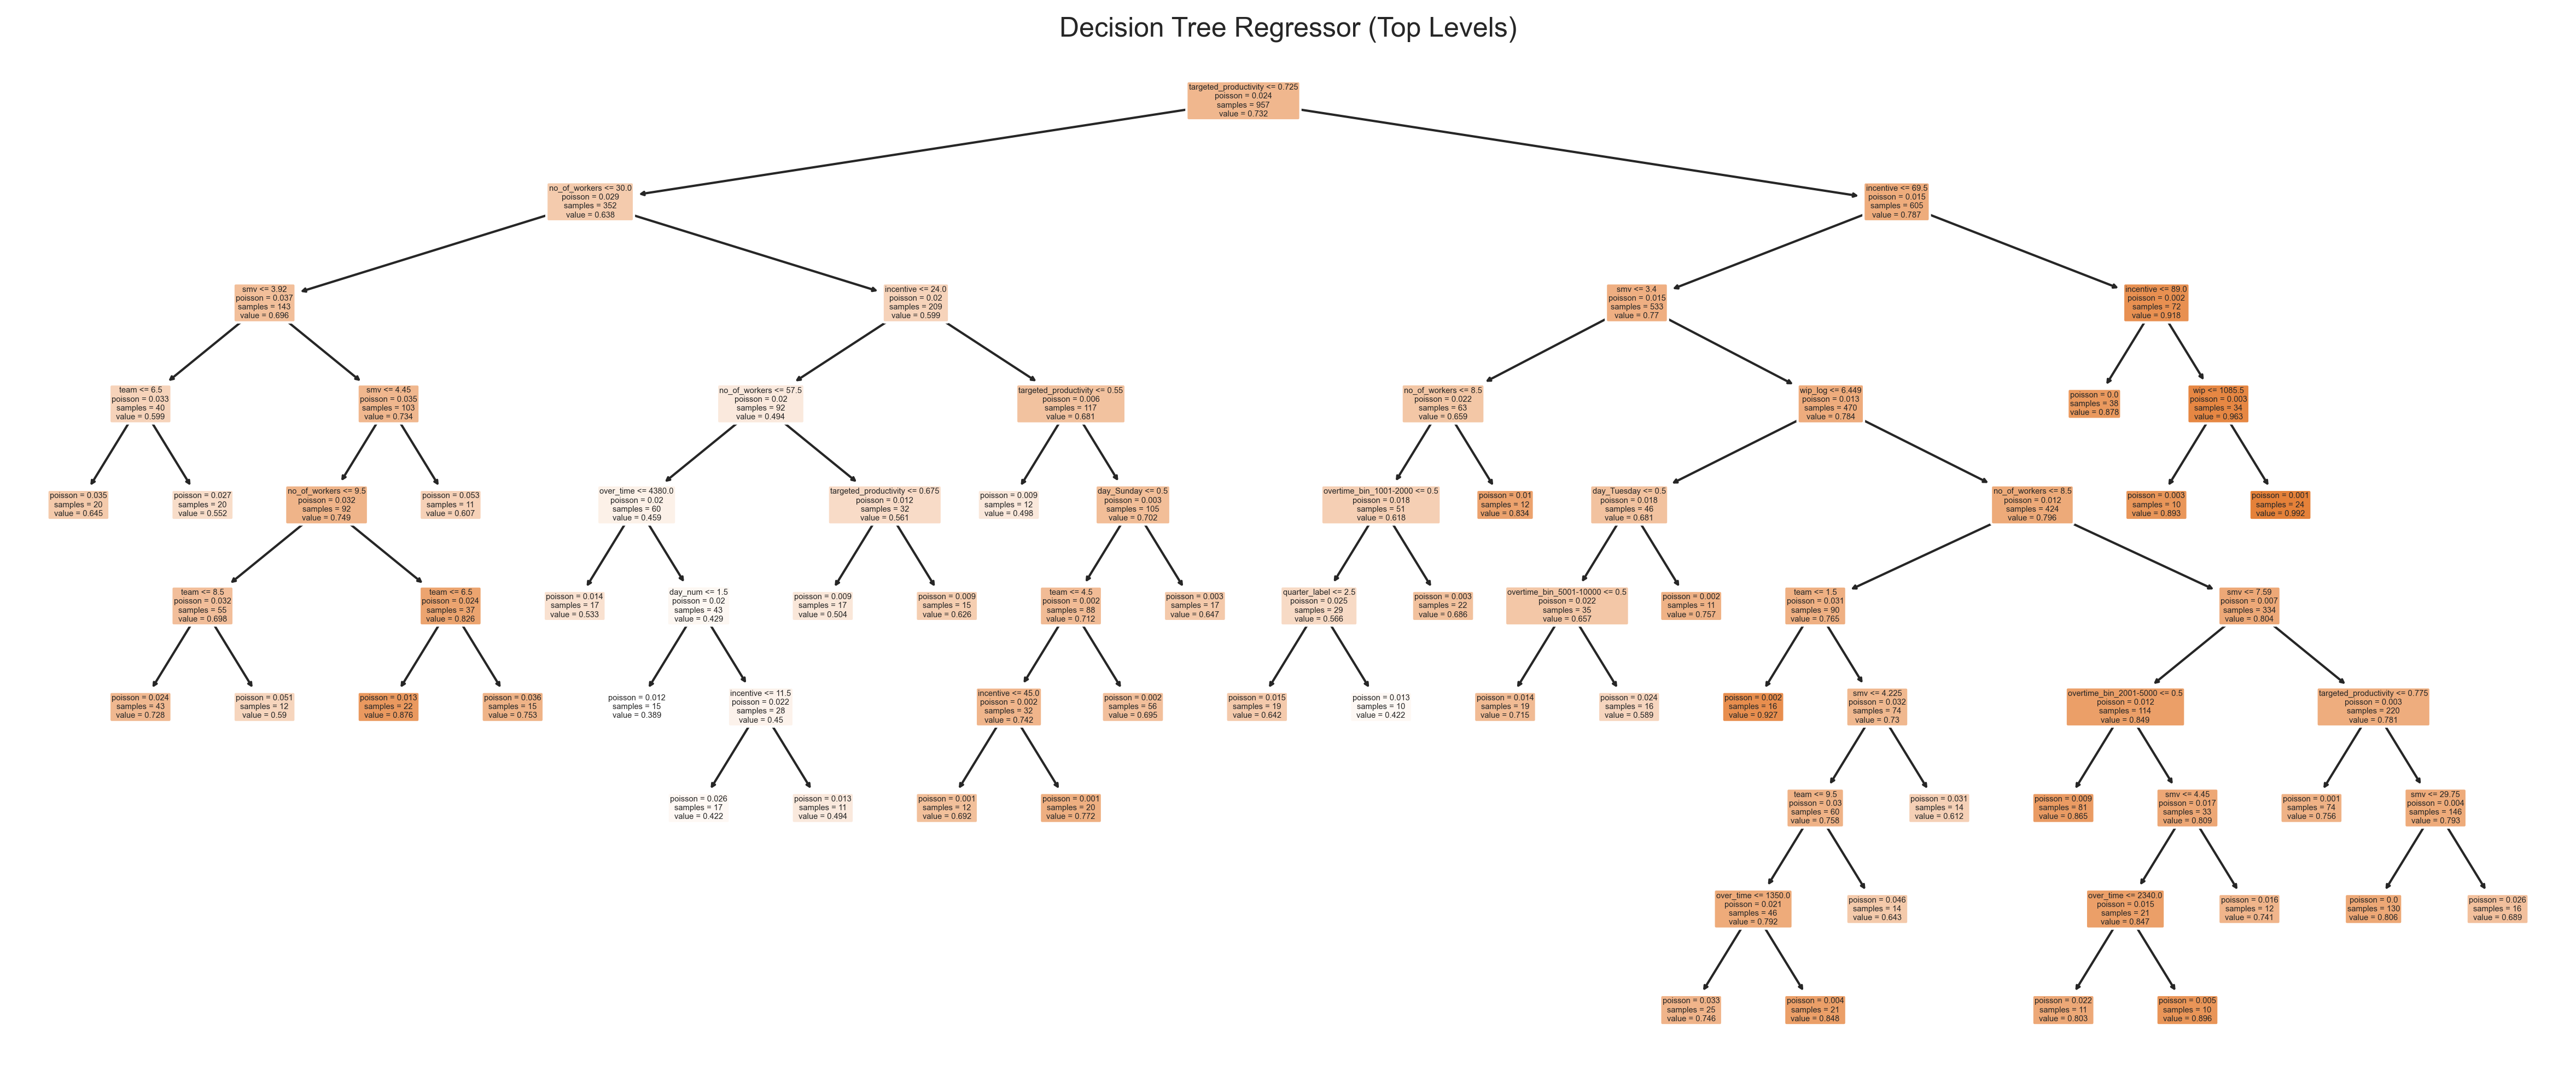

In [12]:
# Visualize the tree

plt.figure(figsize=(20, 8))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, max_depth=10)
plt.title("Decision Tree Regressor (Top Levels)")
plt.show()

In [14]:
# Saving the best model

import joblib
joblib.dump(best_tree, '../../models/dtr_small_best.pkl')

['../../models/dtr_small_best.pkl']

### Conclusion

This experiment focused on building a regression model using a Decision Tree Regressor to predict actual garment production productivity. After baseline evaluation, the model was systematically tuned using GridSearchCV across multiple hyperparameters relevant to the dataset’s operational characteristics. The final model significantly improved over the default, achieving an R² of 0.4434, and provided interpretable insights into which features most influenced productivity outcomes. Through this process, the experiment not only demonstrated the effectiveness of decision trees but also reinforced the importance of thoughtful feature handling, parameter tuning, and explainable model evaluation in applied machine learning.